# Descriptive Analysis

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import date
import re

In [2]:
pd.set_option('display.max_columns', None)

## Loading data

In [3]:
ratings_df = pd.read_csv('Prepared Frames/rating_data.csv')
main_df = pd.read_csv('Prepared Frames/rated.csv')

In [4]:
main_df.columns

Index(['Ticker', 'SimFinId', 'Company Name', 'IndustryId', 'tokens',
       'current_search', 'Fiscal Year', 'Fiscal Period', 'Report Date',
       'Shares (Diluted)', 'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Total Current Assets',
       'Property, Plant & Equipment, Net', 'Other Long Term Assets',
       'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals',
       'Total Current Liabilities', 'Total Noncurrent Liabilities',
       'Total Liabilities', 'Share Capital & Additional Paid-In Capital',
       'Retained Earnings', 'Total Equity', 'Revenue', 'Cost of Revenue',
       'Gross Profit', 'Operating Expenses',
       'Selling, General & Administrative', 'Operating Income (Loss)',
       'Non-Operating Income (Loss)', 'Interest Expense, Net',
       'Pretax Income (Loss), Adj.', 'Abnormal Gains (Losses)',
       'Pretax Income (Loss)', 'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',

## Removing bad data
During the analysis I repeatedly came across implausible data or mismatched companies.
I will drop the problematic entries here at the beginning of the notebook, so that all consecutive analysis are also corrected.

In [5]:
# This company was mismatched
main_df = main_df[main_df['Ticker']!='RBBN']
# This row has implausible data, the interest expenses are 10 times higher than their whole assets
main_df.drop(index =[1856],inplace = True, axis = 0)

In [6]:
main_df.index[1857]

1863

## About the ratings

https://www.moodys.com/sites/products/productattachments/ap075378_1_1408_ki.pdf

We are looking at moodys long term credit ratings. They are structured in the following order from best to worst.

Investment grade:
Aaa
Aa
A
Baa

Non Investment Grade:
Ba
B
Caa
Ca
C

Default:
D

The appended number is an indicator weather a company ranges on the upper or lower end of their credit
rating.
Sice these create a lot of sub-categories we will remove the appended numbers and just look at the actual ratings.

In [7]:
# Removing numbers:
def rem_digits(rating):
    return re.sub('[0-9]','',rating)

main_df['Rating'] = main_df['Rating'].apply(rem_digits)

In [60]:
# Saving with the cleaned Ratings
main_df.to_csv('Prepared Frames/rated_v2.csv', index=False)

In [8]:
# Extra column for sorting
# Since sorting the rating alphabetically does not give us the right order. 
# I will create an extra column with a numerized version, that will help us visualize better.

rating_numbered = {'Aaa':11,'Aa':12,'A':13,'Baa':21,'Ba':22,'B':23,'Caa':31,'Ca':32,'C':33,'D':40}
main_df['Rating_numbered'] = main_df['Rating'].map(rating_numbered)

## Distribution of ratings

<AxesSubplot:xlabel='Rating', ylabel='count'>

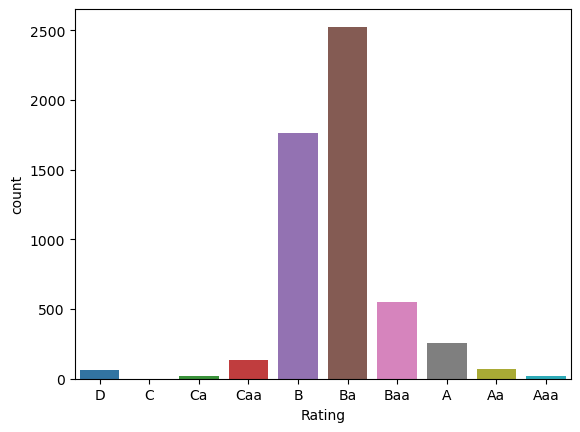

In [9]:
# We can see a big number of companies with B ratings and very few with A or C
sns.countplot(x='Rating', data=main_df.sort_values(by = ['Rating_numbered'], ascending = False))

We can see a lot of concentration on the middle field, with a low amount of companies in the A-grade range.
It looks, like the majority of companies are non investment grade. We will look at the numbers.

In [10]:
# Investment grade:
id_count = len(main_df[main_df['Rating_numbered']<22])
id_count
entries = len(main_df)

id_count/len(main_df) *100

16.567828020756114

## Insight :
Only 19 percent of our dataframe are investment grade.

## Interest expenses
We calculate a columnm, that gives us an estimate of the average interst expense of a company in relation to their total debt load.

In [11]:
main_df['interest_ratio'] = main_df['Interest Expense, Net']/main_df['Total Liabilities']*-100

I multiply in the end with 100 to have the number as a percentage.
Since I divide by the interest expenses, which have a negative sign, I negate that, to get a positive percentage.
Some companies have actual income through this, since they have big cash or investment postitions, I will not include them,
because we are interested in if copmpanies have to pay more because of their rating. These companies now end up with a - in front of their interest rate.

In [12]:
main_df.sort_values(by = ['interest_ratio'], ascending = True) 

,Ticker,SimFinId,Company Name,IndustryId,tokens,current_search,Fiscal Year,Fiscal Period,Report Date,Shares (Diluted),"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Total Current Assets,"Property, Plant & Equipment, Net",Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Total Current Liabilities,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Total Equity,Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common),Sector,Industry,difflib,Rating,Rating_numbered,interest_ratio
2708,EXEL,289286.0,"EXELIXIS, INC.",106002.0,"['EXELIXIS', ',', 'INC', '.']",0.0,2019,Q3,2019-09-30,315566000.0,760667000.0,1.835890e+08,9.721120e+08,4.946700e+07,2.765230e+08,8.127530e+08,1.784865e+09,7.836800e+07,1.410690e+08,4.007900e+07,1.811480e+08,2.229143e+09,-6.280940e+08,1.603717e+09,2.717030e+08,-7.537000e+06,264166000.0,-148560000.0,-51265000.0,115606000.0,7051000.0,20253000.0,122657000.0,0.0,122657000.0,-25205000.0,97452000.0,0.0,97452000.0,97452000.0,Healthcare,Biotechnology,"exelis, inc.",Ba,22,-11.180361
1956,EXEL,289286.0,"EXELIXIS, INC.",106002.0,"['EXELIXIS', ',', 'INC', '.']",0.0,2018,Q4,2018-12-31,312818000.0,693334000.0,1.627710e+08,8.970160e+08,5.089700e+07,3.171860e+08,5.252700e+08,1.422286e+09,9.051800e+07,1.054720e+08,2.936100e+07,1.348330e+08,2.168517e+09,-8.803630e+08,1.287453e+09,2.286020e+08,-7.352000e+06,221250000.0,-109648000.0,-52377000.0,111602000.0,4770000.0,12841000.0,116372000.0,0.0,116372000.0,243717000.0,360089000.0,0.0,360089000.0,360089000.0,Healthcare,Biotechnology,"exelis, inc.",Ba,22,-9.523633
1981,AAC_delist,939324.0,"AAC Holdings, Inc.",106011.0,"['AAC', 'Holdings', ',', 'Inc', '.']",0.0,2018,Q4,2018-12-31,24243906.0,5409000.0,4.786000e+07,6.396400e+07,1.669210e+08,2.213920e+08,3.883130e+08,4.522770e+08,5.193000e+07,3.614450e+08,4.855900e+07,4.100040e+08,1.619870e+08,-9.757400e+07,4.227300e+07,5.744800e+07,-6.800700e+07,-10559000.0,-14203000.0,-5524000.0,-24762000.0,23518000.0,23340000.0,-1244000.0,0.0,-40174000.0,1729000.0,-38445000.0,0.0,-36677000.0,-36677000.0,Healthcare,Health Care Providers,"aac holdings, inc.",Caa,31,-5.692627
4049,UNIT,990739.0,Uniti Group Inc.,109001.0,"['Uniti', 'Group', 'Inc', '.']",0.0,2020,Q4,2020-12-31,231566000.0,141900000.0,4.413000e+08,7.956000e+08,3.577900e+09,5.047600e+09,8.625500e+09,9.421100e+09,2.312000e+08,1.035200e+09,6.874400e+09,7.909600e+09,1.800000e+06,4.720000e+07,1.511500e+09,4.696530e+08,-1.234845e+08,146898500.0,735064000.0,-101114000.0,389717000.0,388755000.0,331327000.0,778472000.0,0.0,744390000.0,-26050000.0,718340000.0,0.0,706532000.0,707391000.0,Real Estate,REITs,uniti group inc.,B,23,-4.188922
3015,EXEL,289286.0,"EXELIXIS, INC.",106002.0,"['EXELIXIS', ',', 'INC', '.']",0.0,2019,Q4,2019-12-31,314898000.0,852243000.0,1.190730e+08,1.011190e+09,4.889200e+07,2.892030e+08,8.744800e+08,1.885670e+09,9.957800e+07,1.427460e+08,5.695400e+07,1.997000e+08,2.242252e+09,-5.593510e+08,1.685970e+09,2.403100e+08,-1.052000e+07,229790000.0,-152474000.0,-58026000.0,77316000.0,7698000.0,7706000.0,85014000.0,0.0,85014000.0,-16271000.0,68743000.0,0.0,68743000.0,68743000.0,Healthcare,Biotechnology,"exelis, inc.",Ba,22,-3.858788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,XOG_delist,863612.0,"Extraction Oil & Gas, Inc.",107002.0,"['Extraction', 'Oil', '&', 'Gas', ',', 'Inc', ...",0.0,2018,Q1,2018-03-31,171910000.0,15363000.0,6.155200e+07,2.025110e+08,3.292315e+09,7.037300e+07,3.362688e+09,3.565199e+09,3

<AxesSubplot:xlabel='interest_ratio', ylabel='Count'>

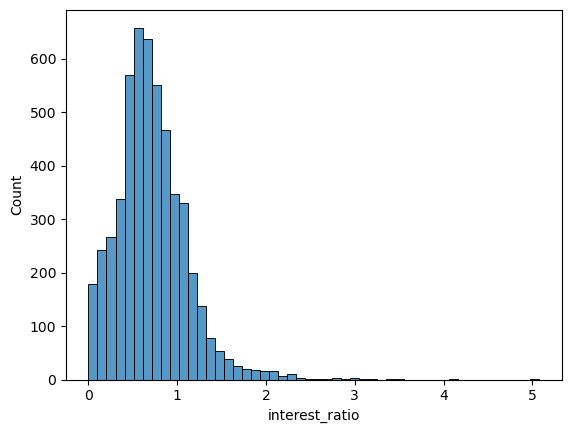

In [13]:
sns.histplot(data=main_df[main_df['interest_ratio'] > 0]['interest_ratio'], bins = 50)

Distribution for Rating:Baa


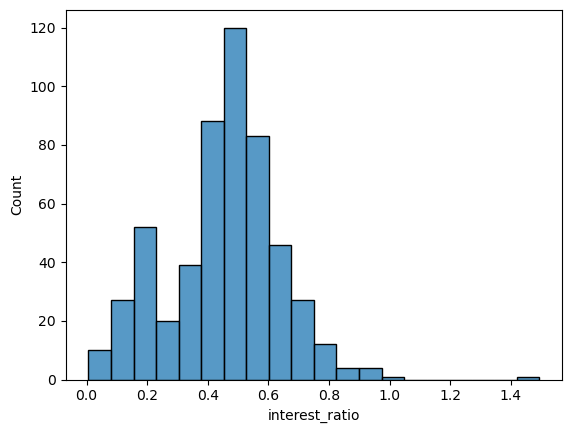

Distribution for Rating:B


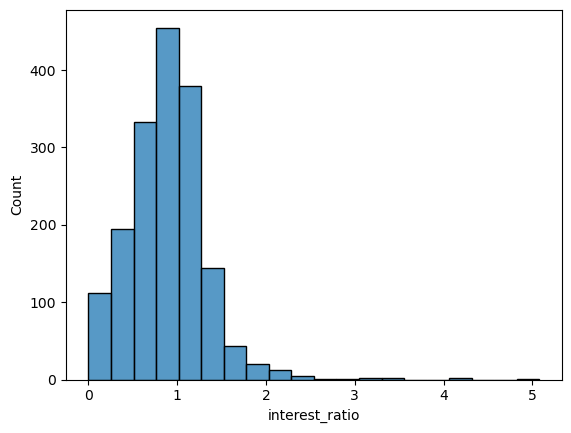

Distribution for Rating:Ba


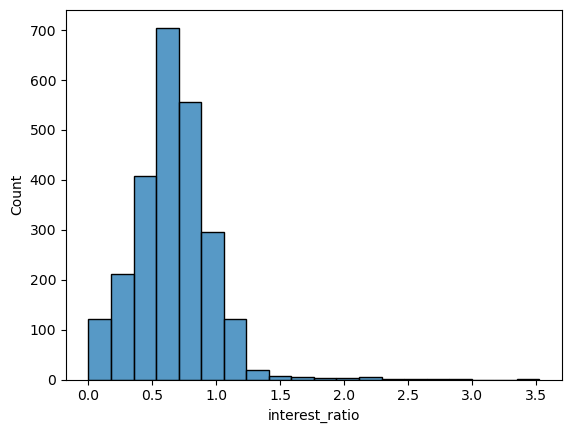

Distribution for Rating:Aa


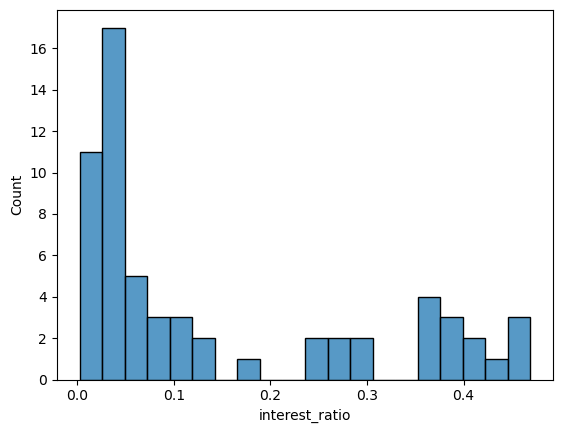

Distribution for Rating:A


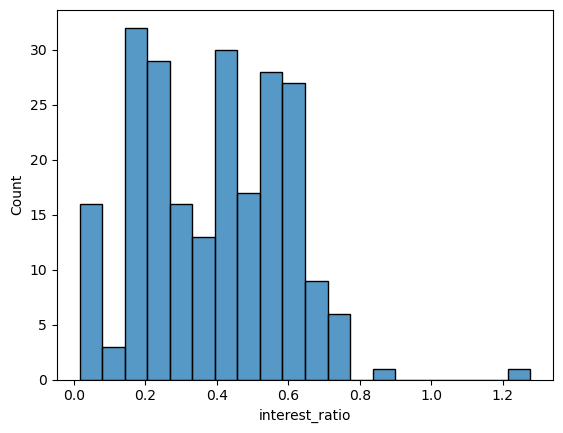

Distribution for Rating:Caa


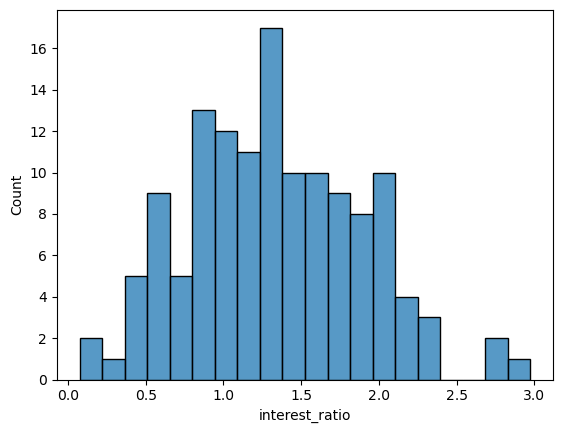

Distribution for Rating:Aaa


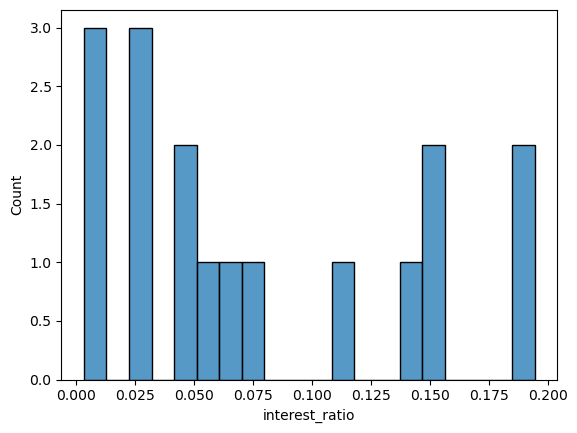

Distribution for Rating:Ca


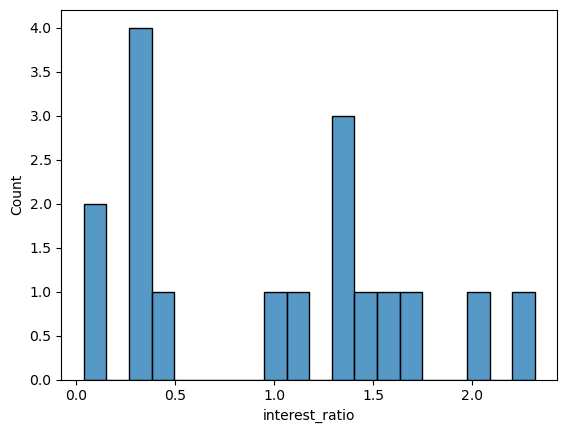

Distribution for Rating:D


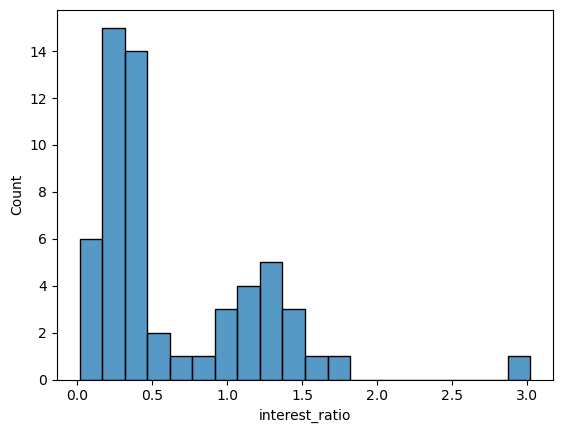

Distribution for Rating:C


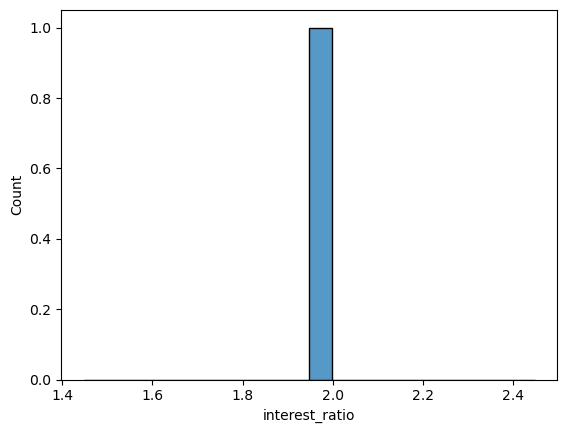

In [14]:
# We look at the distribution for different credit ratings
for rating in list(main_df['Rating'].unique()):
    print('Distribution for Rating:' + str(rating))
    sns.histplot(data=main_df[ (main_df['interest_ratio'] > 0) & (main_df['Rating'] == rating)]['interest_ratio'], bins = 20)
    plt.show()

It is not visible very good, but we see a definitive tendency, that companies with a higher credit rating tend to have higher interest expenses.

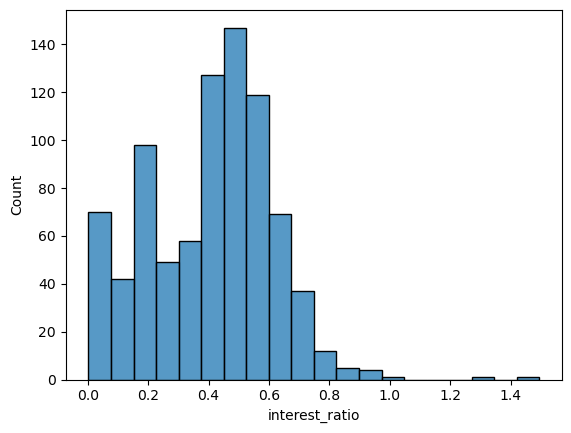

In [15]:
# For companies with investment grade
sns.histplot(data=main_df[ (main_df['interest_ratio'] > 0) & (main_df['Rating_numbered'] < 22)]['interest_ratio'], bins = 20)
plt.show()

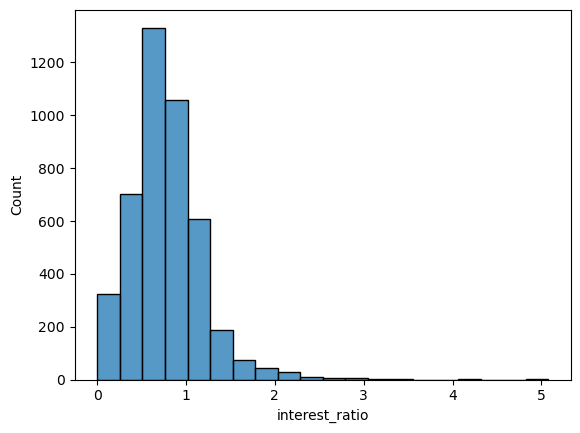

In [16]:
# For companies without investment grade
sns.histplot(data=main_df[ (main_df['interest_ratio'] > 0) & (main_df['Rating_numbered'] >= 22)]['interest_ratio'], bins = 20)
plt.show()

In [17]:
# This way we see a clear distinction

## Calculating the average interst expense to liability for Baa rates vs Ba rated for the presentation

In [25]:
avg_baa = np.mean(main_df[main_df['Rating']=='Baa']['interest_ratio'])
avg_baa

0.41819921159936146

In [26]:
avg_ba = np.mean(main_df[main_df['Rating']=='Ba']['interest_ratio'])
avg_ba

0.6311295218143216

In [28]:
# That makes a percentage difference of
((avg_ba/avg_baa)-1)*100
# 50.9%

50.91599991320626

## Picking an example for impact of interest expenses
What we are looking for is a company with high interest expenses wich is still making a profit, we serach in our data for one.
This will be for a fictive example of how key metrics could be affected by a change in credit rating.

In [53]:
# We need acolumn with income to interest expense ratio to search for a fitting company
main_df['income_to_interest'] = (main_df['Interest Expense, Net']/main_df['Pretax Income (Loss)'])*-1 # We change the sign to have a positive value, since this is a ratio.

In [54]:
# We search for a company with a high ratio, which has a Baa rating
main_df[main_df['Rating']=='Baa'].sort_values(by = 'income_to_interest', ascending = False).head(50)

,Ticker,SimFinId,Company Name,IndustryId,tokens,current_search,Fiscal Year,Fiscal Period,Report Date,Shares (Diluted),"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Total Current Assets,"Property, Plant & Equipment, Net",Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Total Current Liabilities,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Total Equity,Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common),Sector,Industry,difflib,Rating,Rating_numbered,interest_ratio,Investment_Grade,income_to_interest
596,SRE,378214.0,Sempra Energy,105001.0,"['Sempra', 'Energy']",0.0,2017,Q3,2017-09-30,2.533640e+08,1.890000e+08,1.387000e+09,3.010000e+09,3.538400e+10,1.173500e+10,4.711900e+10,5.012900e+10,2.095000e+09,7.194000e+09,2.743300e+10,3.462700e+10,3.088000e+09,1.085500e+10,1.550200e+10,2.679000e+09,-9.580000e+08,1.721000e+09,-1.251000e+09,-1.304889e+09,4.700000e+08,-113000000.0,-1.530000e+08,3.570000e+08,0.0,5.000000e+06,84000000.0,1.020000e+08,0.0,5.700000e+07,5.700000e+07,Utilities,Utilities - Regulated,sempra energy,Baa,21,0.441852,Investment Grade,30.600000
808,PNM,1067473.0,PNM RESOURCES INC,105002.0,"['PNM', 'RESOURCES', 'INC']",0.0,2017,Q4,2017-12-31,8.016800e+07,3.974000e+06,1.080550e+08,2.944200e+08,4.980227e+09,1.030919e+09,6.351683e+09,6.646103e+09,1.837400e+08,8.356440e+08,4.037482e+09,4.873126e+09,1.157665e+09,6.335280e+08,1.772977e+09,3.326050e+08,-1.359610e+08,1.966440e+08,-1.445320e+08,-4.528200e+07,5.211200e+07,-29906000.0,-2.792000e+07,2.220600e+07,0.0,4.601000e+06,-55186000.0,-5.058500e+07,0.0,-5.415000e+07,-5.428200e+07,Utilities,Utilities - Independent Power Producers,"pnm resources, inc.",Baa,21,0.572938,Investment Grade,6.068246
1918,EBAY,104109.0,EBAY INC,103002.0,"['EBAY', 'INC']",0.0,2018,Q4,2018-12-31,9.480000e+08,4.915000e+09,7.120000e+08,7.126000e+09,1.597000e+09,1.031800e+10,1.569300e+10,2.281900e+10,4.030000e+08,4.454000e+09,1.208400e+10,1.653800e+10,1.571800e+10,1.645900e+10,6.281000e+09,7.810000e+08,-2.590000e+08,5.220000e+08,-2.670000e+08,-2.230000e+08,2.550000e+08,-164000000.0,-1.640000e+08,9.100000e+07,0.0,4.700000e+07,316000000.0,3.630000e+08,0.0,7.600000e+08,7.600000e+08,Consumer Cyclical,Retail - Apparel & Specialty,ebay inc.,Baa,21,0.991656,Investment Grade,3.489362
2264,FTI,637893.0,TechnipFMC plc,107004.0,"['TechnipFMC', 'plc']",0.0,2019,Q1,2019-03-31,6.092352e+08,4.965300e+09,2.250300e+09,1.125210e+10,3.381900e+09,1.059400e+10,1.437780e+10,2.562990e+10,3.004400e+09,9.628500e+09,5.589300e+09,1.521780e+10,1.061780e+10,1.047900e+09,1.041210e+10,2.913000e+09,-2.365900e+09,5.471000e+08,-3.377000e+08,-2.978000e+08,2.094000e+08,-100500000.0,-8.820000e+07,1.089000e+08,0.0,3.430000e+07,-14500000.0,1.980000e+07,0.0,2.090000e+07,2.090000e+07,Energy,Oil & Gas - Services,technipfmc plc,Baa,21,0.579584,Investment Grade,2.571429
2503,ACC,445593.0,American Campus Communities Inc,109001.0,"['American', 'Campus', 'Communities', 'Inc']",0.0,2019,Q2,2019-06-30,1.382439e+08,5.154100e+07,2.200800e+07,1.661160e+08,6.676217e+09,5.405640e+08,7.216781e+09,7.382897e+09,6.707900e+07,6.707900e+07,3.689023e+09,3.756102e+09,4.458416e+09,-1.059633e+09,3.626795e+09,2.173710e+08,-9.076300e+07,1.266080e+08,-8.467900e+07,-8.115000e+06,4.192900e+07,-26099000.0,-2.609900e+07,1.583000e+07,0.0,1.052400e+07,-314000.0,1.021000e+07,0.0,1.038600e+07,1.038600e+07,Real Estate,REITs,"american campus communities, inc.",Baa,21,0.694843,Investment Grade,2.479951
193,FTI,637893.0,TechnipFMC plc,107004.0,"['TechnipFMC', 'plc']",0.0,2017,Q1,2017-03-31,6.271104e+08,7.041700e+09,2.433300e+09,1.373480e+1

In [59]:
# We will take hewlett packard as an example
# Of course we will have to take the pre tax income as an example
main_df.iloc[main_df.index == 2701]

,Ticker,SimFinId,Company Name,IndustryId,tokens,current_search,Fiscal Year,Fiscal Period,Report Date,Shares (Diluted),"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Total Current Assets,"Property, Plant & Equipment, Net",Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Total Current Liabilities,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Total Equity,Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common),Sector,Industry,difflib,Rating,Rating_numbered,interest_ratio,Investment_Grade,income_to_interest
2701,EBAY,104109.0,EBAY INC,103002.0,"['EBAY', 'INC']",0.0,2019,Q3,2019-09-30,836000000.0,3.086000e+09,714000000.0,5.209000e+09,1.516000e+09,1.054300e+10,1.350500e+10,1.871400e+10,491000000.0,3.685000e+09,1.175900e+10,1.544400e+10,1.599000e+10,1.731500e+10,3.270000e+09,1.070000e+09,-349000000.0,721000000.0,-457000000.0,-345000000.0,264000000.0,-141000000.0,-141000000.0,123000000.0,0.0,72000000.0,51000000.0,123000000.0,0.0,310000000.0,310000000.0,Consumer Cyclical,Retail - Apparel & Specialty,ebay inc.,Baa,21,0.912976,Investment Grade,1.958333


# Feature Engineering

## We create an additional column, with only Investment Grade or Non Investment Grade

In [18]:
main_df['Investment_Grade'] = main_df['Rating_numbered'].apply(lambda x: 'Investment Grade' if x < 22 else 'Non Investment Grade' )

In [21]:
main_df['Investment_Grade']

0           Investment Grade
1           Investment Grade
2       Non Investment Grade
3       Non Investment Grade
4       Non Investment Grade
                ...         
5410        Investment Grade
5411    Non Investment Grade
5412    Non Investment Grade
5413    Non Investment Grade
5414    Non Investment Grade
Name: Investment_Grade, Length: 5396, dtype: object

# Saving for tableau presentation

In [22]:
# Since tableau seems to have a problem with the commas in the text parts we drop them, since we only need the summarized data
# for visualizations
tableau_interest = main_df[main_df['interest_ratio']>0].drop(['Company Name','difflib'],axis = 1)
tableau_interest.to_csv('Data for Tableau/interest_rate.csv', index=False)